## Multi-layer perceptron 

https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-with-regression-model

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


In [2]:
#X = pd.read_csv('~/CSE193/Data_Folder/Demo3_5/Weather_Stat_GPS_concat.csv', index_col=0, header=0)
#y = pd.read_csv('~/CSE193/Data_Folder/Demo3_5/Wearable_label.csv',index_col=None,header=0)
Wearable = pd.read_excel('Data_Folder/4_12_outsided_wearable.xlsx',header=0,index_col=0)
Weather = pd.read_csv('Data_Folder/weather_4_12.txt',delimiter=',',header=None,index_col=False)
Weather.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [3]:
from datetime import datetime
for i in Weather.index:
    Weather.set_value(i, 'New_Time', datetime.strptime(Weather.iloc[i,0], '%Y-%m-%d %H:%M:%S'), takeable=False)
Weather = Weather.resample('1T', on='New_Time').mean()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
Wearable

,nan,Time(s),Violet,Blue,Green,Yellow,Orange,Red,time
2019-04-12 09:11:00,2019-04-12 09:11:01,1.0,966.0,815.0,1093.0,1299.0,1798.0,2172.0,2019-04-12 09:11:01.000
NaT,2019-04-12 09:12:01,61.0,9792.0,15489.0,9931.0,11436.0,9921.0,11636.0,2019-04-12 09:12:01.000
NaT,2019-04-12 09:13:01,121.0,11598.0,17379.0,12857.0,14013.0,12871.0,13586.0,2019-04-12 09:13:01.000
NaT,2019-04-12 09:14:01,181.0,11880.0,17717.0,13247.0,14379.0,13289.0,13906.0,2019-04-12 09:14:01.010
NaT,2019-04-12 09:15:01,241.0,12126.0,18008.0,13495.0,14647.0,13522.0,14164.0,2019-04-12 09:15:01.015
NaT,2019-04-12 09:16:01,301.0,12328.0,18213.0,13697.0,14854.0,13743.0,14364.0,2019-04-12 09:16:01.020
NaT,2019-04-12 09:17:01,361.0,12494.0,18432.0,13901.0,15074.0,13968.0,14587.0,2019-04-12 09:17:01.025
NaT,2019-04-12 09:18:01,421.0,12631.0,18652.0,14121.0,15298.0,14145.0,14777.0,2019-04-12 09:18:01.030
NaT,2019-04-12 09:19:01,481.0,12806.0,18881.0,14396.0,15532.0,14337.0,14974.0,2019-04-12 09:19:01.035
NaT,2019-04-12 09:20:01,541.0,13001.0,19184.0,14691.0,15837.0,14580.0,15223.0,2019-04-12 09:20:01.040


In [5]:
from datetime import datetime
#for i in range(Wearable.shape[0]):
    #Weather.set_value(i, 'New_Time', datetime.strptime(Wearable.iloc[i,8], '%Y-%m-%d %H:%M:%S'), takeable=False)
Wearable = Wearable.resample('1T', on='time').mean()

#Wearable.set_index('time', inplace=True)

Wearable

,Time(s),Violet,Blue,Green,Yellow,Orange,Red
time,,,,,,,
2019-04-12 09:11:00,1.0,966.0,815.0,1093.0,1299.0,1798.0,2172.0
2019-04-12 09:12:00,61.0,9792.0,15489.0,9931.0,11436.0,9921.0,11636.0
2019-04-12 09:13:00,121.0,11598.0,17379.0,12857.0,14013.0,12871.0,13586.0
2019-04-12 09:14:00,181.0,11880.0,17717.0,13247.0,14379.0,13289.0,13906.0
2019-04-12 09:15:00,241.0,12126.0,18008.0,13495.0,14647.0,13522.0,14164.0
2019-04-12 09:16:00,301.0,12328.0,18213.0,13697.0,14854.0,13743.0,14364.0
2019-04-12 09:17:00,361.0,12494.0,18432.0,13901.0,15074.0,13968.0,14587.0
2019-04-12 09:18:00,421.0,12631.0,18652.0,14121.0,15298.0,14145.0,14777.0
2019-04-12 09:19:00,481.0,12806.0,18881.0,14396.0,15532.0,14337.0,14974.0


In [6]:
#Wearable.index = range(999)
Wearable = Wearable.iloc[:612,:]
Wearable = Wearable.drop(Wearable.columns[0], axis=1)
#Wearable.drop(['#VALUE!'],axis=1)
Wearable

,Violet,Blue,Green,Yellow,Orange,Red
time,,,,,,
2019-04-12 09:11:00,966.0,815.0,1093.0,1299.0,1798.0,2172.0
2019-04-12 09:12:00,9792.0,15489.0,9931.0,11436.0,9921.0,11636.0
2019-04-12 09:13:00,11598.0,17379.0,12857.0,14013.0,12871.0,13586.0
2019-04-12 09:14:00,11880.0,17717.0,13247.0,14379.0,13289.0,13906.0
2019-04-12 09:15:00,12126.0,18008.0,13495.0,14647.0,13522.0,14164.0
2019-04-12 09:16:00,12328.0,18213.0,13697.0,14854.0,13743.0,14364.0
2019-04-12 09:17:00,12494.0,18432.0,13901.0,15074.0,13968.0,14587.0
2019-04-12 09:18:00,12631.0,18652.0,14121.0,15298.0,14145.0,14777.0
2019-04-12 09:19:00,12806.0,18881.0,14396.0,15532.0,14337.0,14974.0


In [7]:
Weather = Weather.iloc[551:1163]
Weather

,Bar,TempIn,HumIn,TempOut,Wind,Wind10,Wdir,HumOut,RainRate,UV,Solar
New_Time,,,,,,,,,,,
2019-04-12 09:11:00,993.865236,22.777778,38.000000,15.000000,0.968585,0.894079,280.000000,85.000000,0.0,11.500000,187.666667
2019-04-12 09:12:00,993.865236,22.777778,38.000000,15.000000,0.372533,0.968585,280.000000,85.000000,0.0,11.666667,181.000000
2019-04-12 09:13:00,993.859649,22.777778,38.000000,15.000000,0.968585,1.266611,280.000000,85.000000,0.0,14.500000,241.166667
2019-04-12 09:14:00,993.831713,22.777778,38.000000,15.000000,0.745065,0.894079,280.000000,85.000000,0.0,15.000000,542.666667
2019-04-12 09:15:00,993.831713,22.777778,38.000000,15.000000,0.000000,0.894079,280.000000,85.000000,0.0,15.333333,544.000000
2019-04-12 09:16:00,993.831713,22.777778,38.000000,15.000000,0.447039,0.894079,280.000000,85.000000,0.0,16.000000,544.000000
2019-04-12 09:17:00,993.831713,22.777778,38.000000,15.000000,0.000000,0.894079,280.000000,85.000000,0.0,16.000000,546.400000
2019-04-12 09:18:00,993.831713,22.777778,38.000000,15.000000,0.000000,0.894079,280.000000,85.000000,0.0,16.000000,548.666667
2019-04-12 09:19:00,993.831713,22.777778,38.000000,15.000000,0.670559,0.819572,280.000000,84.500000,0.0,17.000000,556.666667


In [8]:
Weather_Wearable = pd.concat([Weather, Wearable],axis=1)
corr = Weather_Wearable.corr()
corr.style.background_gradient(cmap='coolwarm')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Bar,TempIn,HumIn,TempOut,Wind,Wind10,Wdir,HumOut,RainRate,UV,Solar,Violet,Blue,Green,Yellow,Orange,Red
Bar,1,-0.633732,-0.813481,-0.377648,-0.142422,-0.196921,-0.28603,-0.0540741,nan,0.308212,0.229475,0.554842,0.434181,0.579634,0.585122,0.550112,0.468005
TempIn,-0.633732,1,0.69371,0.677927,-0.0287621,-0.00647541,0.515074,-0.378797,nan,-0.396564,-0.473005,-0.564218,-0.494399,-0.698517,-0.608785,-0.650905,-0.488436
HumIn,-0.813481,0.69371,1,0.582214,0.282451,0.346161,0.23134,0.0318174,nan,-0.0847108,-0.0785595,-0.375425,-0.249003,-0.512022,-0.425009,-0.469366,-0.255619
TempOut,-0.377648,0.677927,0.582214,1,0.268695,0.295479,0.14307,-0.31314,nan,0.161729,0.0769169,-0.0886097,0.00165878,-0.320947,-0.137804,-0.274096,0.0289258
Wind,-0.142422,-0.0287621,0.282451,0.268695,1,0.856316,-0.471969,0.342636,nan,0.711924,0.739323,0.297298,0.539632,0.138137,0.314231,0.134677,0.527463
Wind10,-0.196921,-0.00647541,0.346161,0.295479,0.856316,1,-0.557349,0.467132,nan,0.776472,0.807331,0.318703,0.594311,0.135334,0.334406,0.132584,0.583458
Wdir,-0.28603,0.515074,0.23134,0.14307,-0.471969,-0.557349,1,-0.451548,nan,-0.690148,-0.736897,-0.570731,-0.667253,-0.514242,-0.602099,-0.486512,-0.655669
HumOut,-0.0540741,-0.378797,0.0318174,-0.31314,0.342636,0.467132,-0.451548,1,nan,0.429634,0.45792,0.140708,0.276146,0.138881,0.159794,0.120172,0.27153
RainRate,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
UV,0.308212,-0.396564,-0.0847108,0.161729,0.711924,0.776472,-0.690148,0.429634,nan,1,0.959336,0.66867,0.823004,0.488399,0.67047,0.484541,0.849877


### three layers 32 perceptrons, with relu and adam

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Weather, Wearable, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 11))
# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))
# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 6))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 10, epochs = 100)
   
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

Train on 489 samples, validate on 123 samples
Epoch 1/100
489/489 [==============================] - 0s 980us/step - loss: 663944830.2986 - val_loss: 568636502.1138
Epoch 2/100
489/489 [==============================] - 0s 182us/step - loss: 663620735.8691 - val_loss: 567816720.6504
Epoch 3/100
489/489 [==============================] - 0s 172us/step - loss: 660671375.7055 - val_loss: 561854797.7886
Epoch 4/100
489/489 [==============================] - 0s 191us/step - loss: 645963209.0961 - val_loss: 538861386.6667
Epoch 5/100
489/489 [==============================] - 0s 166us/step - loss: 602384093.1861 - val_loss: 480108224.0000
Epoch 6/100
489/489 [==============================] - 0s 185us/step - loss: 510447362.8466 - val_loss: 375869328.3902
Epoch 7/100
489/489 [==============================] - 0s 175us/step - loss: 373364263.1002 - val_loss: 248797851.3171
Epoch 8/100
489/489 [==============================] - 0s 182us/step - loss: 231889518.7730 - val_loss: 155400761.2358
Ep

Epoch 70/100
489/489 [==============================] - 0s 186us/step - loss: 61303221.5624 - val_loss: 72954120.6504
Epoch 71/100
489/489 [==============================] - 0s 175us/step - loss: 61128454.1472 - val_loss: 72978583.2195
Epoch 72/100
489/489 [==============================] - 0s 176us/step - loss: 61092745.5460 - val_loss: 72885980.3252
Epoch 73/100
489/489 [==============================] - 0s 165us/step - loss: 60958068.6953 - val_loss: 72789968.0976
Epoch 74/100
489/489 [==============================] - 0s 173us/step - loss: 61060989.1125 - val_loss: 72728399.6748
Epoch 75/100
489/489 [==============================] - 0s 175us/step - loss: 60850685.4540 - val_loss: 72481976.5203
Epoch 76/100
489/489 [==============================] - 0s 165us/step - loss: 60769363.6728 - val_loss: 72569725.3333
Epoch 77/100
489/489 [==============================] - 0s 177us/step - loss: 60633689.3538 - val_loss: 72549564.7805
Epoch 78/100
489/489 [==============================] - 

Text(0,0.5,'predicted value')

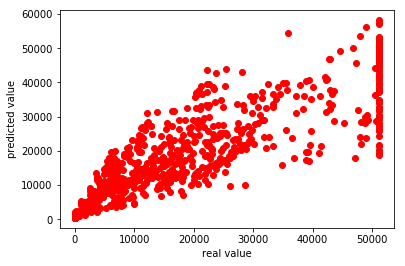

In [14]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel('real value')
plt.ylabel('predicted value')

In [15]:
print mse

70558402.64823085


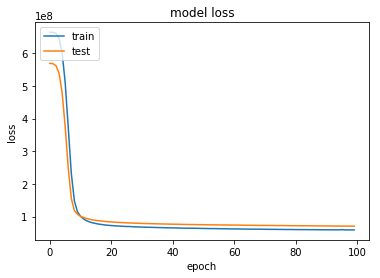

In [16]:
# plot the loss history of the model
# code obtained: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### four layers 50 perceptron with relu and adam

In [17]:
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(50, activation = 'relu', input_dim = 11))
# Adding the second hidden layer
model.add(Dense(units = 50, activation = 'relu'))
# Adding the third hidden layer
model.add(Dense(units = 50, activation = 'relu'))
# Adding the fourth hidden layer
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 6))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the ANN to the Training set
model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 10, epochs = 100)
   

Train on 489 samples, validate on 123 samples
Epoch 1/100
489/489 [==============================] - 1s 1ms/step - loss: 663865320.4417 - val_loss: 568245793.0407
Epoch 2/100
489/489 [==============================] - 0s 225us/step - loss: 657817019.9427 - val_loss: 547277793.5610
Epoch 3/100
489/489 [==============================] - 0s 261us/step - loss: 555486823.6564 - val_loss: 330773579.1870
Epoch 4/100
489/489 [==============================] - 0s 229us/step - loss: 214062830.7894 - val_loss: 117531707.3821
Epoch 5/100
489/489 [==============================] - 0s 236us/step - loss: 97999808.7526 - val_loss: 98684579.0244
Epoch 6/100
489/489 [==============================] - 0s 207us/step - loss: 82296033.3497 - val_loss: 90253509.4959
Epoch 7/100
489/489 [==============================] - 0s 196us/step - loss: 76618405.0798 - val_loss: 86900967.3171
Epoch 8/100
489/489 [==============================] - 0s 197us/step - loss: 73751040.3272 - val_loss: 84628044.8780
Epoch 9/100


489/489 [==============================] - 0s 197us/step - loss: 55622355.7342 - val_loss: 65612618.0163
Epoch 71/100
489/489 [==============================] - 0s 194us/step - loss: 55453857.5419 - val_loss: 65444294.4715
Epoch 72/100
489/489 [==============================] - 0s 188us/step - loss: 55366877.9059 - val_loss: 65883425.5285
Epoch 73/100
489/489 [==============================] - 0s 198us/step - loss: 55428092.2454 - val_loss: 67964248.6504
Epoch 74/100
489/489 [==============================] - 0s 198us/step - loss: 55581976.7117 - val_loss: 65786577.9837
Epoch 75/100
489/489 [==============================] - 0s 208us/step - loss: 54938052.8875 - val_loss: 65018406.6667
Epoch 76/100
489/489 [==============================] - 0s 207us/step - loss: 54742654.3640 - val_loss: 65552583.5772
Epoch 77/100
489/489 [==============================] - 0s 198us/step - loss: 55366672.6871 - val_loss: 65372052.4878
Epoch 78/100
489/489 [==============================] - 0s 302us/step

In [18]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print mse

63174178.77481379


Text(0,0.5,'predicted value')

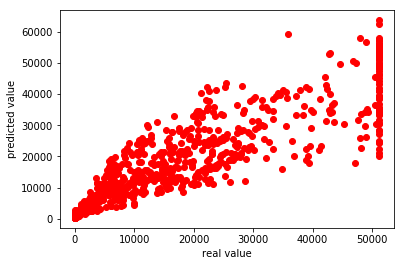

In [19]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel('real value')
plt.ylabel('predicted value')

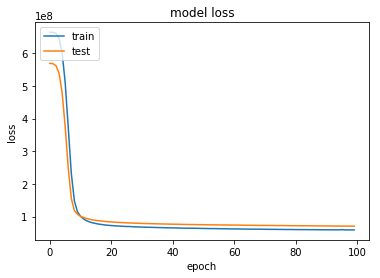

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### five layers 100 perceptrons with adam and relu

### adjust the training rate, and the time we used to train the data to prevent overfitting

In [ ]:
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(100, activation = 'relu', input_dim = 11))
# Adding the second hidden layer
model.add(Dense(units = 100, activation = 'relu'))
# Adding the third hidden layer
model.add(Dense(units = 100, activation = 'relu'))
# Adding the fourth hidden layer
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 6))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 2000)
   

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print mse

In [ ]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel('real value')
plt.ylabel('predicted value')

In [ ]:
# using this code bc I will manually split the train/test data
# I know it is not the optimal
y_time = y.iloc[:,0]
#y.drop(columns='time',inplace=True)
#y_col_names = ['vio','blue','green','yellow','orange','red']
#https://maitra.public.iastate.edu/stat501/lectures/MultivariateRegression.pdf
# trying to regress on multiple dependent variables but for now just stick with the original one


In [ ]:
# Splitting the dataset into the Training set and Test set
y = y.drop(['time'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

filter_X = X[['TempIn','HumIn','TempOut','UV','Solar']]


X_2train, X_2test, y_2train, y_2test = train_test_split(filter_X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_2train = sc.fit_transform(X_2train)
X_2test = sc.transform(X_2test)

# Initialising the ANN
model = Sequential()
model2 = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'tanh', input_dim = 24))
model2.add(Dense(32, activation = 'tanh', input_dim = 5))
# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'tanh'))
model2.add(Dense(units = 32, activation = 'tanh'))
# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'tanh'))
model2.add(Dense(units = 32, activation = 'tanh'))

In [ ]:
# Adding the output layer

model.add(Dense(units = 6))
model2.add(Dense(units = 6))
#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the ANN to the Training set

model.fit(X_train, y_train, batch_size = 10, epochs = 100)
model2.fit(X_2train, y_2train, batch_size = 10, epochs = 100)
   
y_pred = model.predict(X_test)
y_2pred = model2.predict(X_2test)

mse = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_2test, y_2pred)
#plt.scatter(y_time,y_pred_list[idx], color = 'red', label = y_col_names[idx])
#plt.scatter(y_time, y_pred, color = 'blue', label = ('Predicted',y_col_names[idx]))
    
    #ax[idx].scatter(y_time,y_pred_list[idx], color = 'red', label = y_col_names[idx])
    #ax[idx].scatter(y_time,y_pred, color = 'blue', label = ('Predicted',y_col_names[idx])
    #ax[idx].set_title(y_col_names[idx])
    #mse.append(mean_squared_error(y_pred_list[idx], y_pred))
    #plt.scatter(y_pred_list, color = 'red', label = y_col_names[idx])
  

### keras early stopping

In [ ]:
mse,mse2

In [ ]:
y_pred, y_test

In [ ]:
y_time.shape
y_pred.shape
X.shape

In [ ]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel('real value')
plt.ylabel('predicted value')

In [ ]:
plt.scatter(y_2test,y_2pred, color = 'red')
plt.xlabel('real value')
plt.ylabel('predicted value')

## Linear Regression/Lasso/Ridge

In [21]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Lasso_train_score = ll.score(X_train,y_train)
Lasso_test_score = ll.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [23]:
#Returns the coefficient of determination R^2 of the prediction.
train_score,test_score,

(0.7544061058661419, 0.6551160404194729)

In [24]:
Lasso_train_score,Lasso_test_score

(0.7544060965130092, 0.6551206798262205)

In [25]:
pd.DataFrame(ll.coef_)

,0,1,2,3,4,5,6,7,8,9,10
0,5931.845223,1768.626054,2347.821961,-801.598084,-2302.118438,-4759.157671,-1089.240528,-1609.656984,0.0,-4410.626613,18906.889704
1,6696.045172,3744.890750,922.899549,-991.920105,-1699.995742,42.494061,-159.021466,-1059.293777,0.0,-7576.225171,23525.340775
2,3263.793456,-1286.643430,905.031737,-1252.825037,-1464.224472,-3286.710112,-883.315979,-1492.872291,0.0,-5956.065576,14206.471174
3,7657.432892,2436.771538,1603.518708,-773.560608,-2033.494409,-3891.664538,-1074.508838,-1325.589939,0.0,-10283.759314,24591.906060
4,3253.366127,-1647.154523,1412.104321,-1503.713745,-1958.291244,-4297.020634,-1066.629761,-2056.828532,0.0,-4132.861597,14592.616197
5,6754.701073,2887.520165,1196.180655,-672.480804,-2215.327275,16.485849,97.841273,-1223.295097,0.0,-1292.257811,18646.268332


In [26]:
Ridge_train_score,Ridge_test_score

(0.75440605635137, 0.6551260095889756)

In [38]:
regression_test_X = Weather[['Bar','UV','Solar']]
#y = y.drop(['time'],axis=1)
X_second_train, X_second_test, y_train, y_test = train_test_split(regression_test_X, Wearable, test_size = 0.2, random_state = 0)

In [39]:
lr.fit(X_second_train, y_train)
ll.fit(X_second_train, y_train)
rr.fit(X_second_train, y_train)

train_score=lr.score(X_second_train, y_train)
test_score=lr.score(X_second_test, y_test)

Lasso_train_score = ll.score(X_second_train,y_train)
Lasso_test_score = ll.score(X_second_test, y_test)

Ridge_train_score = rr.score(X_second_train,y_train)
Ridge_test_score = rr.score(X_second_test, y_test)

In [40]:
train_score,test_score,

(0.7213036373998242, 0.6203305633688658)

In [41]:
Lasso_train_score,Lasso_test_score

(0.7213036368492384, 0.6203329490935668)

In [42]:
Ridge_train_score,Ridge_test_score

(0.7213036286383849, 0.6203398153432046)

In [37]:
# use PCR model 
# I just wanna try different things
from scipy.signal import savgol_filter 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model 
from sklearn.model_selection import cross_val_predict 


In [ ]:
def pcr(X,y_train_list,pc):
    ''' Principal Component Regression in Python'''
    ''' Step 1: PCA on input data'''
 
    # Define the PCA object
    pca = PCA()
 
    # Preprocessing (1): first derivative
    #d1X = savgol_filter(X, 7, polyorder = 5, deriv=1)
 
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    #Xstd = StandardScaler().fit_transform(dataset[:,:])
 
    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(X)[:,:pc]
 
 
    ''' Step 2: regression on selected principal components'''
 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    mean_sqr=[]
    # Fit
    for idx in range(len(y_train_list)):
        regr.fit(Xreg, y_train_list[idx])
        
        # Calibration
        y_pre=[]
        y_c = regr.predict(X_test)
        y_pre.append(y_c)
        # Cross-validation
        #y_cv = cross_val_predict(regr, Xreg, y_train_list, cv=10)


        # Calculate mean square error for calibration and cross validation
        mse_c = mean_squared_error(y, y_c)
        #mse_cv = mean_squared_error(y, y_cv)
        mean_sqr.append(mse_c)
    return(mean_sqr,y_pre)

In [ ]:
'''def pcr(X,y,pc):
     Principal Component Regression in Python
     Step 1: PCA on input data
 
    # Define the PCA object
    pca = PCA()
 
    # Preprocessing (1): first derivative
    #d1X = savgol_filter(X, 7, polyorder = 5, deriv=1)
 
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(dataset[:,:])
 
    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:,:pc]
 
 
     Step 2: regression on selected principal components
 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Fit
    regr.fit(Xreg, y)
 
    # Calibration
    y_c = regr.predict(Xreg)
 
    # Cross-validation
    y_cv = cross_val_predict(regr, Xreg, y, cv=10)
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    return(y_cv, score_c, score_cv, mse_c, mse_cv)'''

In [ ]:
X = pd.DataFrame.as_matrix(dataset)

In [ ]:
#mean_sqr,y_pre = pcr(X,y_train_list, pc=4)

In [ ]:
predicted, r2r, r2cv, mser, mscv = pcr(X,y, pc=4)

# Regression plot
z = np.polyfit(y, predicted, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y, predicted, c='red', edgecolors='k')
    ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(r2cv))
    plt.xlabel('Measured $^{\circ}$Brix')
    plt.ylabel('Predicted $^{\circ}$Brix')
    plt.show()

In [ ]:
print mser

In [ ]:

#https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
# simple explanation on what is density estimation

In [ ]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    #kde_skl.fit(x[:, np.newaxis])
    kde_skl.fit(x)
    # score_samples() returns the log-likelihood of the samples
    #log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x_grid[:, None])
    return np.exp(log_pdf)


In [ ]:
# The grid we'll use for plotting
x_grid = np.linspace(0, 500, 500)
pdf = kde_sklearn(X, x_grid, bandwidth=0.2)
plt.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
plt.fill(x_grid, pdf_true, ec='gray', fc='gray', alpha=0.4)
plt.set_title('kde_sklearn')
plt.set_xlim(0,500)